<a href="https://colab.research.google.com/github/MargaritaFateeva/Terver_matstat/blob/main/DZ09_terver%26matstat_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 9. Линейная регрессия Логистическая регрессия

**Задача 1** Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

РЕШЕНИЕ:

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

In [69]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

<function matplotlib.pyplot.show(close=None, block=None)>

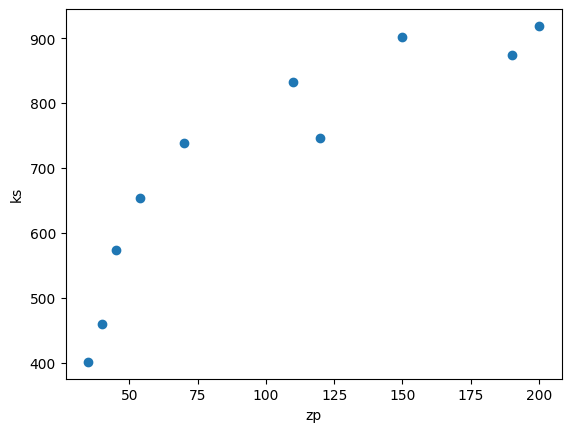

In [3]:
plt.scatter(zp, ks)
plt.xlabel('zp')
plt.ylabel('ks')
plt.show

МОДЕЛЬ С КОНСТАНТОЙ

In [4]:
model=LinearRegression()
first=zp.reshape(-1,1)
first

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [6]:
model.fit(first,ks)
model.coef_, model.intercept_

(array([2.62053888]), 444.1773573243595)

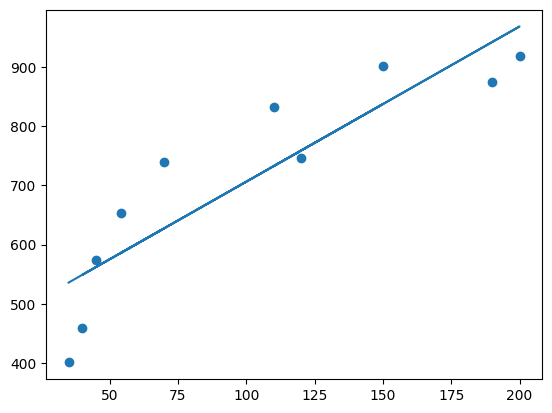

In [7]:
plt.scatter(zp, ks)
plt.plot(zp, 444.177+2.620*zp)

In [9]:
r2=model.score(first, ks)
r2

0.7876386635293685

In [10]:
m=1
n=len(ks)
F=(r2/m)/((1-r2)/(n-m-1))
F

29.67164085966449

In [12]:
a=0.05

f1=stats.f.ppf(1-a, m, n-m-1)
f1

5.317655071578714

F - наблюдаемое значение
f1 - критическое значение, правосторонняя область

F=29.67 > f1=5.31

F попадает в критическую область значит гипотезу о нулевых коэффициентах модели отвергаем (r2 коэффициент детерминации нулевой)

Значит полученная модель линейной регрессии статистически значима
уравнение регрессии описывает исходные данные

МОДЕЛЬ БЕЗ КОНСТАНТЫ

In [16]:
model2=LinearRegression(fit_intercept=False)
first=zp.reshape(-1,1)
first

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [23]:
model2.fit(first,ks)
model2.coef_, model2.intercept_

(array([5.88982042]), 0.0)

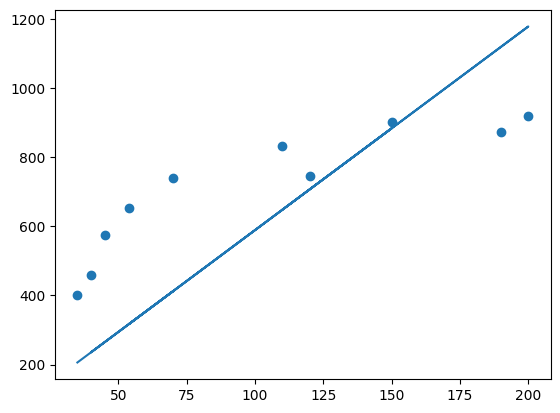

In [24]:
plt.scatter(zp, ks)
plt.plot(zp, 5.889*zp)

In [30]:
r2_2=model2.score(first, ks)
r2_2

-0.8549037531632884

In [21]:
m=1
n=len(ks)
F=(r2_2/m)/((1-r2_2)/(n-m-1))
F

-3.68710776159837

In [26]:
a=0.05

f1=stats.f.ppf(1-a, m, n-m-1)
f1

5.317655071578714

Если я взяла верную формулу R2 для модели без константы??(r2 не может быть отрицательным)
F - наблюдаемое значение
f1 - критическое значение, правосторонняя область
F=-3.68 < f1=5.31 F НЕ попадает в критическую область значит гипотезу о нулевых коэффициентах модели ПРИНИМАЕМ (r2 коэффициент детерминации нулевой)

Значит полученная модель линейной регрессии статистически НЕ значима
уравнение регрессии без константы ks= 5.889*zp НЕ описывает исходные данные
неверно, нужно выбрать другую модель регрессии

ПРОВЕРКА МОДЕЛИ БЕЗ КОНСТАНТЫ - r2 неверно взяла формулу(не поняла какая нужна здесь для верного расчета)

p-value 0.00 - значит отвергается гипотеза о незначимости коэффициентов
p-value для статистики Фишера 1.10e-05 тоже меньше a=0.05 отвергаем гипотезу H0 о нулевом коэффициенте детерминации r2

Значит полученное уравнение регрессии ks=5.889*zp статистически значимо

ниже сравним модели без с констанотой по параметру Adj. R-squared (uncentered)

In [28]:
import statsmodels.api as sm
model3=sm.OLS(ks, zp)
result=model3.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              76.10
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                    1.10e-05
Time:                        17:20:48   Log-Likelihood:                         -68.901
No. Observations:                  10   AIC:                                      139.8
Df Residuals:                       9   BIC:                                      140.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


ПРОВЕРКА МОДЕЛИ С КОНСТАНТОЙ
рассчеты совпадают, Prob (F-statistic): 0.000611 < a=0.05
отвергаем гипотезу H0 о нулевом коэффициенте детерминации r2

Значит полученное уравнение регрессии ks= 444.117 + 2.620*zp статистически значимо

In [29]:
zp = sm.add_constant(zp)
model4=sm.OLS(ks, zp)
result=model4.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           0.000611
Time:                        17:33:15   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.1774     56.466      7.866      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Adj. R-squared:                  0.761 - модель с констаной

Adj. R-squared (uncentered):              0.882 - модель без константы - больше

По скорректированному коэфиициенту детерминации модель без константы лучше описывает исходные данные ks=5.889*zp

А по информационным критериям AIC BIC у модели c констатной показатель ниже значит лучше описывает данные

Остатки распределены нормально в обоих случаях

Выбор модели неоднозначен

**Задача 2** Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

РЕШЕНИЕ:

In [90]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [91]:
def mse_(B1, y=y, x=x, n=10):
  return np.sum((B1*x - y)**2)/n

In [92]:
alpha= 1e-6

# mse = 1/n*np.sum((B1*x - y)**2)
# mse = (2/n) * np.sum((B1*x-y)*x)

In [93]:
B1=0.1
n=10

In [94]:
for i in range (10):
  B1 -= alpha*(2/n) * np.sum((B1*x - y)*x)
  print ('B1 = {}'.format(B1))

B1 = 0.25952808
B1 = 0.414660650906144
B1 = 0.5655188230595969
B1 = 0.7122203698240712
B1 = 0.8548798195302346
B1 = 0.9936085448867542
B1 = 1.1285148499277806
B1 = 1.2597040545647504
B1 = 1.387278576808517
B1 = 1.5113380127259965


In [95]:
for i in range (3000):
  B1 -=alpha*(2/n) * np.sum ((B1*x - y)* x)
  if i%500 ==0:
    print('Iteration = {i}, B1 = {B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration = 0, B1 = 1.6319792141937546, mse=306275.7568040035
Iteration = 500, B1 = 5.889816771625289, mse=56516.8584159028
Iteration = 1000, B1 = 5.8898204201295625, mse=56516.85841571941
Iteration = 1500, B1 = 5.889820420132673, mse=56516.85841571943
Iteration = 2000, B1 = 5.889820420132673, mse=56516.85841571943
Iteration = 2500, B1 = 5.889820420132673, mse=56516.85841571943


In [96]:
mse_(5.8898)

56516.858421464

Коэффициент рассчитанный через МНК без коэффициента и градиентный спуск совпадают b1=5.8898